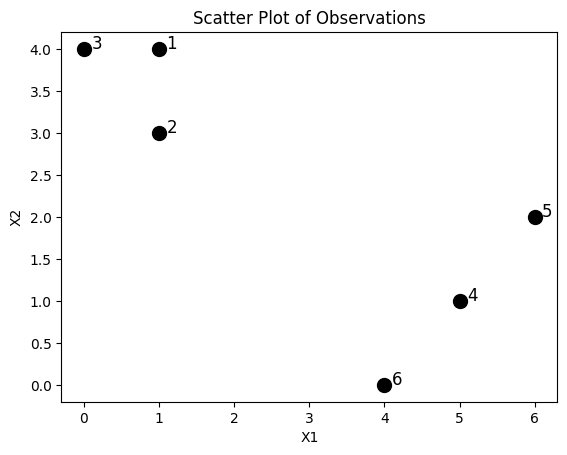

Initial random cluster labels: [1 2 1 1 1 2]
Initial centroids:
[[3.   2.75]
 [2.5  1.5 ]]
Updated cluster labels: [1 1 1 2 1 2]
Updated centroids:
[[2.   3.25]
 [4.5  0.5 ]]
Updated cluster labels: [1 1 1 2 2 2]
Updated centroids:
[[0.66666667 3.66666667]
 [5.         1.        ]]
Updated cluster labels: [1 1 1 2 2 2]


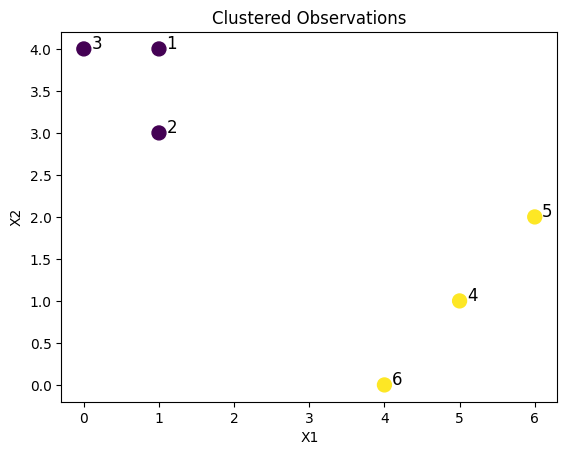

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# (a) Observations
observations = np.array([
    [1, 4],
    [1, 3],
    [0, 4],
    [5, 1],
    [6, 2],
    [4, 0]
])

# Plot the observations
plt.scatter(observations[:, 0], observations[:, 1], c='black', s=100)
for i, txt in enumerate(range(1, 7)):
    plt.text(observations[i, 0] + 0.1, observations[i, 1], txt, fontsize=12)
plt.title('Scatter Plot of Observations')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# (b) Randomly assign cluster labels
np.random.seed(42)
cluster_labels = np.random.choice([1, 2], size=6)
print(f"Initial random cluster labels: {cluster_labels}")

# (c) Compute the centroid for each cluster
def compute_centroids(obs, labels):
    centroids = []
    for cluster in np.unique(labels):
        centroids.append(obs[labels == cluster].mean(axis=0))
    return np.array(centroids)

centroids = compute_centroids(observations, cluster_labels)
print(f"Initial centroids:\n{centroids}")

# (d) Assign observations to the closest centroid
def assign_clusters(obs, centroids):
    distances = np.sqrt(((obs - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0) + 1

new_cluster_labels = assign_clusters(observations, centroids)
print(f"Updated cluster labels: {new_cluster_labels}")

# (e) Repeat until the cluster labels do not change
while not np.array_equal(cluster_labels, new_cluster_labels):
    cluster_labels = new_cluster_labels
    centroids = compute_centroids(observations, cluster_labels)
    new_cluster_labels = assign_clusters(observations, centroids)
    print(f"Updated centroids:\n{centroids}")
    print(f"Updated cluster labels: {new_cluster_labels}")

# (f) Color the observations based on the final cluster labels
plt.scatter(observations[:, 0], observations[:, 1], c=cluster_labels, s=100, cmap='viridis')
for i, txt in enumerate(range(1, 7)):
    plt.text(observations[i, 0] + 0.1, observations[i, 1], txt, fontsize=12)
plt.title('Clustered Observations')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()
